# Relatório do Laboratório #01

### Ferramenta Escolhida: Weka, Python/Pandas.

Inicialmente decidi utilizar o Weka, que, apesar de simples e intuitivo para a finalidade de exploração dos dados, não foi considerada uma ferramenta de visualização adequada para uma apresentação. Assim, posteriormente optei por criar um Notebook Executável e me aventurar um pouco na utilização do Python / Pandas.

### Breve Relato do Processo de Instalação / Familiarização com a Ferramenta:

**Weka**: Como o Weka estava disponível nos repositórios do Debian, sua instalação foi trivial. A ferramenta é intuitiva e, após carregado o arquivo _.csv_, as visualizações de relações entre variáveis ficam prontamente disponíveis numa aba de visualização.

**Jupyter**: Já estava previamente instalado na máquina, mas pelo que me recordo, também foi obtido via pacote _.deb_. Foi necessário a obtenção dos módulos pertinentes para a análise estatística. A instalação foi realizada através do _pip_, incluso nos binários do Python, seguindo a orientação da documentação disponível em https://docs.python.org/3/installing/index.html.

##### Uma Observação em Relação a Utilização do Jupyter/Python/Pandas:
Por conta de ser uma ferramenta com uma grande quantidade de funcionalidades, a abordagem de utilização sugerida é que se parta de um problema específico e conhecimento prévio. Ao passo em que dificuldades forem surgindo, deve-se abordar cada uma delas pontualmente, recorrendo-se especialmente a tutoriais breves e fóruns. A partir de certo ponto, mediante o acúmulo de múltiplos problemas simples resolvidos de forma não muito criteriosa (e.g. seguindo exemplos dados dados em fóruns), surge naturalmente a necessidade e a disposição de verificação de documentação oficial ou tutoriais mais elaborados. Deste modo o trabalho propriamente dito vai fluindo concomitantemente ao aprendizado dos requisitos necessários.

### Descrição da Análise Realizada:

Segue uma descrição da Análise, explicitando o que foi feito e os motivos para cada passo:

#### Importação dos módulos necessários e carga do arquivo _.csv_:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file = r'bemocsna.csv'
df = pd.read_csv(file)
list(df.columns)

['x1', 'x2', 'x3', 'x4', 'y1', 'y2', 'y3', 'y4']

#### Cálculo das Médias:

Foi feito o arredondamento na máscara da impressão dos valores.

In [3]:
print('MÉDIAS:\n')

for i in list(df.columns):
    print('%s: %.2f' % (i, df[i].mean()))

MÉDIAS:

x1: 9.00
x2: 9.00
x3: 9.00
x4: 9.00
y1: 7.50
y2: 7.50
y3: 7.50
y4: 7.50


#### Cálculo das Correlações:

Neste caso optei por truncar os valores através da máscara de impressão. Entendo que o adequado seria truncar no caso das médias, também. Essa foi a minha interpretação do 'apresentar o resultado até a casa decimal _n_'.

In [4]:
print('CORRELAÇÕES:\n')

for i in range(1,5):
    xn = 'x'+str(i)
    yn = 'y'+str(i)
    print("%s, %s: %.5s" % (xn, yn, df[xn].corr(df[yn])))
    

CORRELAÇÕES:

x1, y1: 0.816
x2, y2: 0.816
x3, y3: 0.816
x4, y4: 0.816


#### Representações Gráficas:

Seguindo a hipótese de que possivelmente as 4 séries de experimentos não representariam o mesmo fenômeno, foi produzido um gráfico de dispersão de todas as relações (x,y). Isso já havia sido verificado no **Weka**, mas a visualização não era satisfatória o bastante para uma apresentação.

Além da apresentação dos pontos dispersos, foi traçada uma linha de regressão, o que coloca em evidência as identidades de correlação entre os 4 experimentos.

Posteriormente, as representações visuais foram colocadas lado a lado e, por último, sobrepostas.

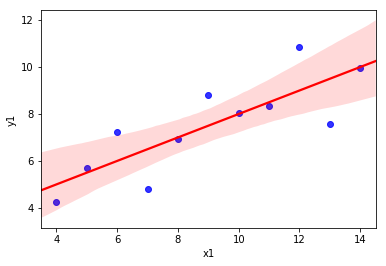

In [5]:
sns.regplot(df['x1'],df['y1'],scatter_kws={"color": "blue"}, line_kws={"color": "red"})

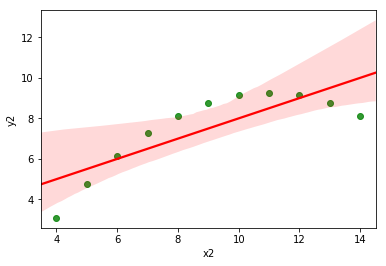

In [6]:
sns.regplot(df['x2'],df['y2'],scatter_kws={"color": "green"}, line_kws={"color": "red"})

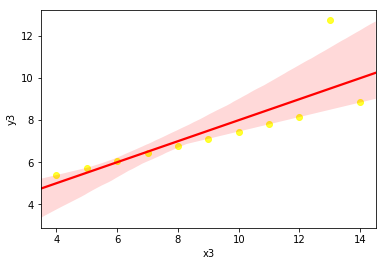

In [7]:
sns.regplot(df['x3'],df['y3'],scatter_kws={"color": "yellow"}, line_kws={"color": "red"})

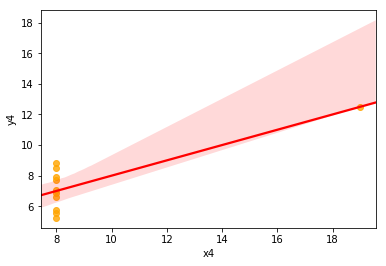

In [8]:
sns.regplot(df['x4'],df['y4'],scatter_kws={"color": "orange"}, line_kws={"color": "red"})

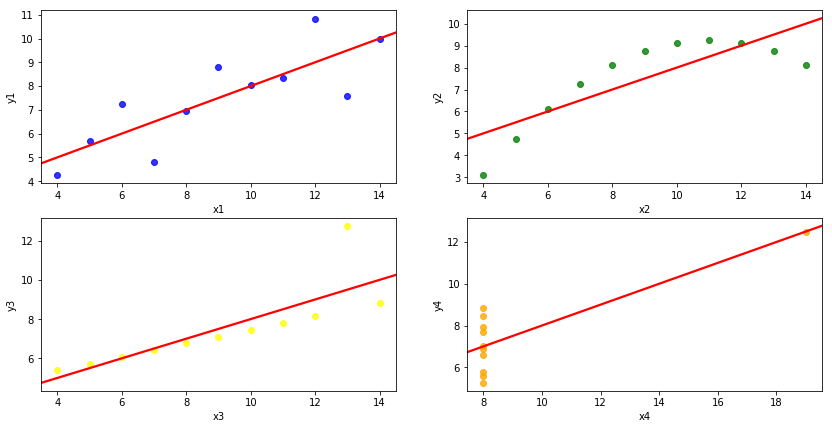

In [9]:
fig, ax = plt.subplots(2, 2, figsize=(14,7))
sns.regplot(df['x1'],df['y1'],scatter_kws={"color": "blue"}, line_kws={"color": "red"}, ci=None, ax = ax[0,0])
sns.regplot(df['x2'],df['y2'],scatter_kws={"color": "green"}, line_kws={"color": "red"}, ci=None, ax = ax[0,1])
sns.regplot(df['x3'],df['y3'],scatter_kws={"color": "yellow"}, line_kws={"color": "red"}, ci=None, ax = ax[1,0])
sns.regplot(df['x4'],df['y4'],scatter_kws={"color": "orange"}, line_kws={"color": "red"}, ci=None, ax = ax[1,1])

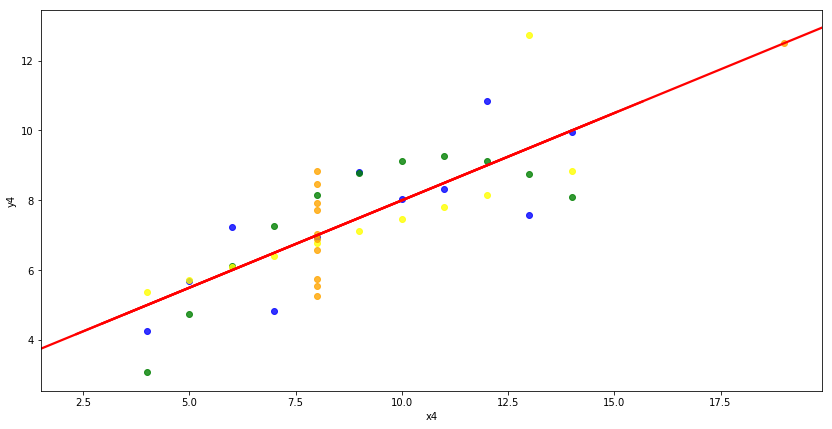

In [10]:
fig = plt.subplots(1, 1, figsize=(14,7))
sns.regplot(df['x1'],df['y1'],scatter_kws={"color": "blue"}, line_kws={"color": "red"}, ci=None)
sns.regplot(df['x2'],df['y2'],scatter_kws={"color": "green"}, line_kws={"color": "red"}, ci=None)
sns.regplot(df['x3'],df['y3'],scatter_kws={"color": "yellow"}, line_kws={"color": "red"}, ci=None)
sns.regplot(df['x4'],df['y4'],scatter_kws={"color": "orange"}, line_kws={"color": "red"}, ci=None)

#### Conclusão:

A partir de uma representação visual ficou evidente que os conjuntos de pares (x,y) não fazem referência a um mesmo fenômeno. As ferramentas da estatística descritiva utilizadas não bastam para uma interpretação integral do(s) fenômeno(s) representado(s) pelo conjunto de dados.

Um aparte é que possivelmente o mero bom senso seja de utilidade como instrumental complementar na exploração de dados. Já era inicialmente claro que havia algo mais a ser relevado ao menos quanto aos dados de (x4,y4).

De resto, a exploração visual de um conjunto de dados aparenta ser essencial para a sua compreensão.

.

_NOTA: Após uma breve pesquisa, descobri que a origem dos dados analisados é o 'Quarteto de Anscombe'. Foi um ponto de partida interessante para que encontrasse algumas boas leituras:_
    https://en.wikipedia.org/wiki/Anscombe's_quartet,
    https://eagereyes.org/criticism/anscombes-quartet.